In [32]:
import numpy as np
import pandas as pd

np.set_printoptions(precision=3, suppress=True) # 소숫점 3자리까지 표현하겠다.

pd_data = pd.read_csv('등록인구추이_20230306201315.csv', encoding='cp949')
np_data = pd_data.to_numpy(dtype = np.int64) # 숫자 전부 int형으로 달라

print(np_data[:10])

[[   2010 1371346 3600381 3567910   32471  401784]
 [   2011 1381257 3586079 3550963   35116  418043]
 [   2012 1389526 3573533 3538484   35049  442199]
 [   2013 1404663 3563578 3527635   35943  467416]
 [   2014 1421648 3557716 3519401   38315  492116]
 [   2015 1437818 3559780 3513777   46003  514630]
 [   2016 1451270 3546887 3498529   48358  536064]
 [   2017 1467555 3520306 3470653   49653  565527]
 [   2018 1480468 3494019 3441453   52566  589961]
 [   2019 1497908 3466563 3413841   52722  620123]]


In [40]:
# 등록인구추이
# 세대수: 10만단위
# 인구: 100만단위
# 한국인: 100만단위
# 외국인: 1000단위
# 65세이상:1000단위...로 변환
sub_data = np.array([1, 100000, 1000000, 1000000, 1000000, 1000])
np_rescaled = np_data / sub_data
print(np_data / sub_data)

[[2010.      13.713    3.6      3.568    0.032  401.784]
 [2011.      13.813    3.586    3.551    0.035  418.043]
 [2012.      13.895    3.574    3.538    0.035  442.199]
 [2013.      14.047    3.564    3.528    0.036  467.416]
 [2014.      14.216    3.558    3.519    0.038  492.116]
 [2015.      14.378    3.56     3.514    0.046  514.63 ]
 [2016.      14.513    3.547    3.499    0.048  536.064]
 [2017.      14.676    3.52     3.471    0.05   565.527]
 [2018.      14.805    3.494    3.441    0.053  589.961]
 [2019.      14.979    3.467    3.414    0.053  620.123]
 [2020.      15.304    3.439    3.392    0.047  657.711]]


In [43]:
# 각 년도별
# 한국인 / 인구 비율
# 외국인 / 인구 비율
print(np_rescaled[0])
print(np_rescaled[:, 3]/ np_rescaled[:,2])
print(np_rescaled[:, 4]/ np_rescaled[:,2])

[2010.      13.713    3.6      3.568    0.032  401.784]
[0.991 0.99  0.99  0.99  0.989 0.987 0.986 0.986 0.985 0.985 0.986]
[0.009 0.01  0.01  0.01  0.011 0.013 0.014 0.014 0.015 0.015 0.014]


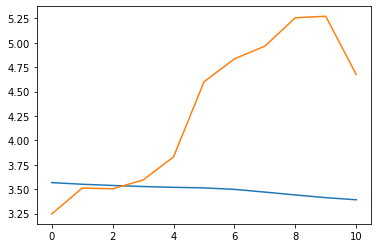

In [48]:
import matplotlib.pyplot as plt

_, axe = plt.subplots()
axe.plot(np_rescaled[:, 3]) # 한국인
axe.plot(np_rescaled[:, 4]*100) # 외국인

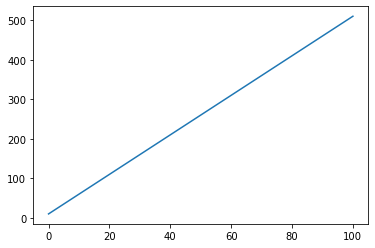

In [51]:
def fn1(ndarr):
    return 5*ndarr+10

_, axe = plt.subplots()
xs = np.linspace(0, 100, 1000) # 0에서 100까지 1000개를 만들어 달라
ys = fn1(xs)
axe.plot(xs, ys)

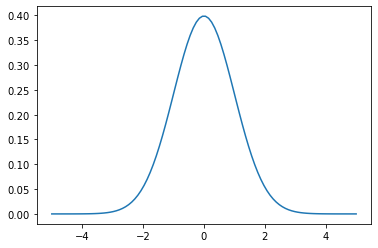

In [60]:
#정규분포(PDF) 만들기

import math
#np.sqrt()
#np.pi
#np.exp()
#np.erf()

def norm_pdf(xs, mu = 0, sig = 1):
    a = -0.5 * ((xs - mu)/sig)**2
    b = np.exp(a)
    c = 1/(sig*np.sqrt(2*np.pi))
    return b*c

_, axe = plt.subplots()
xs = np.linspace(-5, 5, 100) # 0에서 100까지 1000개를 만들어 달라
ys = norm_pdf(xs)
axe.plot(xs, ys)

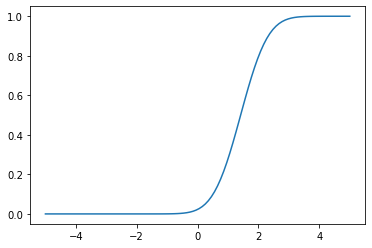

In [67]:
#CDF 만들기
from scipy import special
def norm_cdf(xs, mu=0, sig=1):
    a = special.erf(xs - sig / sig*np.sqrt(2))
    b = 0.5*(1 + a)
    return b

_, axe = plt.subplots()
xs = np.linspace(-5, 5, 100) # 0에서 100까지 1000개를 만들어 달라
ys = norm_cdf(xs)
axe.plot(xs, ys)